In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [494]:
data = pd.read_csv('E:/GUC/Semster 10/Machine Learning/house_prices_data_training_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [495]:
def  featureNormalize(X):

    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
   
    # ================================================================
    return X_norm, mu, sigma

In [496]:

data.dropna(inplace=True)
X=data['bedrooms']
y=data['price']


m = y.size 
X = np.stack([np.ones(m), X], axis=1)
X.shape

(17999, 2)

In [492]:

X = np.concatenate([np.ones((m,1)), X], axis =1)
X.shape

(17999, 3)

In [457]:

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.price,
    test_size=0.2,
    random_state=0)

#Get dimensions of training and testing sets
X_train.shape, X_test.shape


((14399, 21), (3600, 21))

In [458]:
def computeCostMulti(X, y, theta):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  
    return J

In [459]:
  def gradientDescentMulti(X, y, theta, alpha, num_iters):
   # Peform a single gradient step on the parameter vector theta.
  
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
    
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

Text(0, 0.5, 'Cost J')

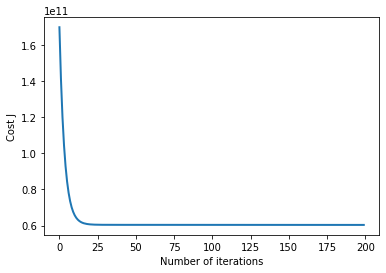

In [460]:

# Choose some alpha value - change this
alpha = 0.01
num_iters = 200

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [461]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [1.         1.         3.36296461]
Computed standard deviation: [0.         0.         0.93400644]


<ipython-input-454-0ba50267d5e8>:11: RuntimeWarning: invalid value encountered in true_divide
  X_norm = (X - mu) / sigma


In [462]:
J = computeCostMulti(X, y, theta=np.array([-1, 2,3]))
print(J)

208472276506.76147


In [463]:
def computeCostMulti3(X, y, theta):
    #  initialize some useful values

    m = y.shape[0]  #number of training examples
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.dot(np.power(X,3), theta) - y)
#==========================
    return J

In [464]:
def gradientDescentMulti3(X, y, theta, alpha, num_iters):
   # Peform a single gradient step on the parameter vector theta.
  
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
    
        theta = theta - (alpha / m) * (np.dot(np.power(X,3), theta) - y).dot(np.power(X,3))
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti3(X, y, theta))
       
        
    
    return theta, J_history

Text(0, 0.5, 'Cost J')

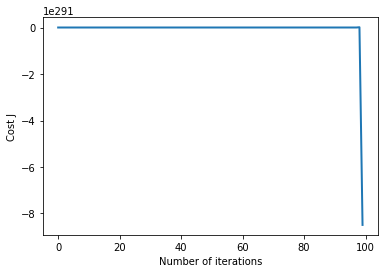

In [465]:
# Choose some alpha value - change this
alpha = 0.01
num_iters = 100

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti3(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')



In [485]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [4,5], [5,6]]) # create an array
y = np.array([1, 2, 3, 4 ,5,6,7]) # Create another array
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [486]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
('TRAIN:', np.array([2, 3]), 'TEST:', np.array([0, 1]))
('TRAIN:', np.array([0, 1]), 'TEST:', np.array([2, 3]))

TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 3 4 5] TEST: [2]
TRAIN: [0 1 2 4 5] TEST: [3]
TRAIN: [0 1 2 3 5] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))